<a href="https://colab.research.google.com/github/GauravN03/Healthcare_Insurance_Analysis/blob/main/HealthCare_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df1=pd.read_csv('/content/sample_data/Hospitalisation details.csv')
df2=pd.read_csv('/content/sample_data/Medical Examinations.csv')
df3=pd.read_excel('/content/sample_data/Names.xlsx')


In [ ]:
df = pd.concat([df1, df2, df3], axis=1, join='inner')
df.set_index('Customer ID', inplace=True)

In [ ]:
df

,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name
Customer ID,,,,,,,,,,,,,,,,
"(Id2335, Id1, Id1)",1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013,47.410,7.47,No,No,No,No major surgery,yes,"Hawks, Ms. Kelly"
"(Id2334, Id2, Id2)",1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013,30.360,5.77,No,No,No,No major surgery,yes,"Lehner, Mr. Matthew D"
"(Id2333, Id3, Id3)",1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013,34.485,11.87,yes,No,No,2,yes,"Lu, Mr. Phil"
"(Id2332, Id4, Id4)",1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013,38.095,6.05,No,No,No,No major surgery,yes,"Osborne, Ms. Kelsey"
"(Id2331, Id5, Id5)",1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013,35.530,5.45,No,No,No,No major surgery,yes,"Kadala, Ms. Kristyn"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(Id13, Id2331, Id2331)",1962,Oct,11,0,48673.56,tier - 1,tier - 2,R1013,22.340,5.57,No,No,No,1,No,"Brietzke, Mr. Jordan"
"(Id12, Id2332, Id2332)",1965,Oct,27,1,48675.52,tier - 1,tier - 2,R1013,17.700,6.28,No,No,No,1,No,"Riveros Gonzalez, Mr. Juan D. Sr."
"(Id11, Id2333, Id2333)",1959,Jul,22,0,48824.45,tier - 2,tier - 1,R1011,16.470,6.35,No,No,Yes,1,No,"Albano, Ms. Julie"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2335 entries, ('Id2335', 'Id1', 'Id1') to ('Id9', 'Id2335', 'Id2335')
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    2335 non-null   object 
 1   month                   2335 non-null   object 
 2   date                    2335 non-null   int64  
 3   children                2335 non-null   int64  
 4   charges                 2335 non-null   float64
 5   Hospital tier           2335 non-null   object 
 6   City tier               2335 non-null   object 
 7   State ID                2335 non-null   object 
 8   BMI                     2335 non-null   float64
 9   HBA1C                   2335 non-null   float64
 10  Heart Issues            2335 non-null   object 
 11  Any Transplants         2335 non-null   object 
 12  Cancer history          2335 non-null   object 
 13  NumberOfMajorSurgeries  2335 non-null   object 
 14 

In [ ]:
cat_var=df.select_dtypes(include='object').columns
cat_var
num_var=df.select_dtypes(exclude='object').columns


In [ ]:
num_var

Index(['date', 'children', 'charges', 'BMI', 'HBA1C'], dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat_var:
  df[i]=le.fit_transform(df[i])

In [ ]:
df

,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name
Customer ID,,,,,,,,,,,,,,,,
"(Id2335, Id1, Id1)",34,3,9,0,563.84,2,3,3,47.410,7.47,0,0,0,3,2,866
"(Id2334, Id2, Id2)",34,5,30,0,570.62,2,1,3,30.360,5.77,0,0,0,3,2,1181
"(Id2333, Id3, Id3)",35,4,30,0,600.00,2,1,3,34.485,11.87,1,0,0,1,2,1238
"(Id2332, Id4, Id4)",34,7,13,0,604.54,3,3,3,38.095,6.05,0,0,0,3,2,1561
"(Id2331, Id5, Id5)",40,3,27,0,637.26,3,3,3,35.530,5.45,0,0,0,3,2,1025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(Id13, Id2331, Id2331)",4,6,11,0,48673.56,1,2,3,22.340,5.57,0,0,0,0,1,234
"(Id12, Id2332, Id2332)",7,6,27,1,48675.52,1,2,3,17.700,6.28,0,0,0,0,1,1755
"(Id11, Id2333, Id2333)",1,3,22,0,48824.45,2,1,1,16.470,6.35,0,0,1,0,1,20


In [ ]:
# from google.colab import sheets
# sheet = sheets.InteractiveSheet(df=df)

In [ ]:
df.isna().sum()

,0
year,0
month,0
date,0
children,0
charges,0
Hospital tier,0
City tier,0
State ID,0
BMI,0
HBA1C,0


In [ ]:
df['date'] = pd.to_datetime(df['date'], errors='coerce') # Convert 'date' column to datetime

#Now you can extract day
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

# Now create the 'newdate' column
df['newdate'] = pd.to_datetime(df[['year', 'month', 'day']].astype(str), errors='coerce').dt.date

In [ ]:
df['date'].dtype

dtype('<M8[ns]')

In [ ]:
df.drop('date',axis=1,inplace=True)

In [ ]:
df.drop('month',axis=1,inplace=True)

In [ ]:
df['date']=df['newdate']

In [ ]:
df.drop('newdate',axis=1,inplace=True)

In [ ]:
df

,year,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name,day,date
Customer ID,,,,,,,,,,,,,,,,
"(Id2335, Id1, Id1)",1970,0,563.84,2,3,3,47.410,7.47,0,0,0,3,2,866,1,1970-01-01
"(Id2334, Id2, Id2)",1970,0,570.62,2,1,3,30.360,5.77,0,0,0,3,2,1181,1,1970-01-01
"(Id2333, Id3, Id3)",1970,0,600.00,2,1,3,34.485,11.87,1,0,0,1,2,1238,1,1970-01-01
"(Id2332, Id4, Id4)",1970,0,604.54,3,3,3,38.095,6.05,0,0,0,3,2,1561,1,1970-01-01
"(Id2331, Id5, Id5)",1970,0,637.26,3,3,3,35.530,5.45,0,0,0,3,2,1025,1,1970-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(Id13, Id2331, Id2331)",1970,0,48673.56,1,2,3,22.340,5.57,0,0,0,0,1,234,1,1970-01-01
"(Id12, Id2332, Id2332)",1970,1,48675.52,1,2,3,17.700,6.28,0,0,0,0,1,1755,1,1970-01-01
"(Id11, Id2333, Id2333)",1970,0,48824.45,2,1,1,16.470,6.35,0,0,1,0,1,20,1,1970-01-01


In [ ]:
df3 = pd.read_excel('/content/sample_data/Names.xlsx')
df = df.reset_index()  # Reset the index of df
df3 = df3.reset_index() # Reset the index of df3
df['Names'] = df3['name']
df = df.set_index('Customer ID') # Set the index back to 'Customer ID'
df

,year,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name,day,date,Names
Customer ID,,,,,,,,,,,,,,,,,
"(Id2335, Id1, Id1)",1970,0,563.84,2,3,3,47.410,7.47,0,0,0,3,2,866,1,1970-01-01,"Hawks, Ms. Kelly"
"(Id2334, Id2, Id2)",1970,0,570.62,2,1,3,30.360,5.77,0,0,0,3,2,1181,1,1970-01-01,"Lehner, Mr. Matthew D"
"(Id2333, Id3, Id3)",1970,0,600.00,2,1,3,34.485,11.87,1,0,0,1,2,1238,1,1970-01-01,"Lu, Mr. Phil"
"(Id2332, Id4, Id4)",1970,0,604.54,3,3,3,38.095,6.05,0,0,0,3,2,1561,1,1970-01-01,"Osborne, Ms. Kelsey"
"(Id2331, Id5, Id5)",1970,0,637.26,3,3,3,35.530,5.45,0,0,0,3,2,1025,1,1970-01-01,"Kadala, Ms. Kristyn"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(Id13, Id2331, Id2331)",1970,0,48673.56,1,2,3,22.340,5.57,0,0,0,0,1,234,1,1970-01-01,"Brietzke, Mr. Jordan"
"(Id12, Id2332, Id2332)",1970,1,48675.52,1,2,3,17.700,6.28,0,0,0,0,1,1755,1,1970-01-01,"Riveros Gonzalez, Mr. Juan D. Sr."
"(Id11, Id2333, Id2333)",1970,0,48824.45,2,1,1,16.470,6.35,0,0,1,0,1,20,1,1970-01-01,"Albano, Ms. Julie"


In [ ]:
# Assuming 'le' is the LabelEncoder instance used for encoding 'Names'
# Create a mapping dictionary for the 'Names' column
names_mapping = dict(zip(le.transform(le.classes_), le.classes_))

# Apply the mapping to the 'Names' column
df['Names'] = df['name'].map(names_mapping)

In [ ]:
# Create a new column named 'gender'
df['gender'] = 0  # Initialize all values to 0

# Set 'gender' to 1 where 'Names' contains 'Mr ' (with a space)
df.loc[df['Names'].str.contains(r'\bMr\b', na=False, regex=True), 'gender'] = 1

# Set 'gender' to 0 where 'Names' contains 'Ms'
df.loc[df['Names'].str.contains(r'\bMs\b', na=False, regex=True), 'gender'] = 0

In [ ]:
df

,year,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name,day,date,Names,gender
Customer ID,,,,,,,,,,,,,,,,,,
"(Id2335, Id1, Id1)",1970,0,563.84,2,3,3,47.410,7.47,0,0,0,3,2,866,1,1970-01-01,"Hawks, Ms. Kelly",0
"(Id2334, Id2, Id2)",1970,0,570.62,2,1,3,30.360,5.77,0,0,0,3,2,1181,1,1970-01-01,"Lehner, Mr. Matthew D",1
"(Id2333, Id3, Id3)",1970,0,600.00,2,1,3,34.485,11.87,1,0,0,1,2,1238,1,1970-01-01,"Lu, Mr. Phil",1
"(Id2332, Id4, Id4)",1970,0,604.54,3,3,3,38.095,6.05,0,0,0,3,2,1561,1,1970-01-01,"Osborne, Ms. Kelsey",0
"(Id2331, Id5, Id5)",1970,0,637.26,3,3,3,35.530,5.45,0,0,0,3,2,1025,1,1970-01-01,"Kadala, Ms. Kristyn",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(Id13, Id2331, Id2331)",1970,0,48673.56,1,2,3,22.340,5.57,0,0,0,0,1,234,1,1970-01-01,"Brietzke, Mr. Jordan",1
"(Id12, Id2332, Id2332)",1970,1,48675.52,1,2,3,17.700,6.28,0,0,0,0,1,1755,1,1970-01-01,"Riveros Gonzalez, Mr. Juan D. Sr.",1
"(Id11, Id2333, Id2333)",1970,0,48824.45,2,1,1,16.470,6.35,0,0,1,0,1,20,1,1970-01-01,"Albano, Ms. Julie",0


In [ ]:
df.drop('name',axis=1,inplace=True)

In [ ]:
from datetime import date
def calculate_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

df['age'] = df['date'].apply(calculate_age)

# 3. Display the DataFrame with the new 'age' column
df

,year,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,day,date,Names,gender,age
Customer ID,,,,,,,,,,,,,,,,,,
"(Id2335, Id1, Id1)",1970,0,563.84,2,3,3,47.410,7.47,0,0,0,3,2,1,1970-01-01,"Hawks, Ms. Kelly",0,55
"(Id2334, Id2, Id2)",1970,0,570.62,2,1,3,30.360,5.77,0,0,0,3,2,1,1970-01-01,"Lehner, Mr. Matthew D",1,55
"(Id2333, Id3, Id3)",1970,0,600.00,2,1,3,34.485,11.87,1,0,0,1,2,1,1970-01-01,"Lu, Mr. Phil",1,55
"(Id2332, Id4, Id4)",1970,0,604.54,3,3,3,38.095,6.05,0,0,0,3,2,1,1970-01-01,"Osborne, Ms. Kelsey",0,55
"(Id2331, Id5, Id5)",1970,0,637.26,3,3,3,35.530,5.45,0,0,0,3,2,1,1970-01-01,"Kadala, Ms. Kristyn",0,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(Id13, Id2331, Id2331)",1970,0,48673.56,1,2,3,22.340,5.57,0,0,0,0,1,1,1970-01-01,"Brietzke, Mr. Jordan",1,55
"(Id12, Id2332, Id2332)",1970,1,48675.52,1,2,3,17.700,6.28,0,0,0,0,1,1,1970-01-01,"Riveros Gonzalez, Mr. Juan D. Sr.",1,55
"(Id11, Id2333, Id2333)",1970,0,48824.45,2,1,1,16.470,6.35,0,0,1,0,1,1,1970-01-01,"Albano, Ms. Julie",0,55


In [ ]:
# Assuming 'df' is your DataFrame and 'date' is the column

df['date'] = pd.to_datetime(df['date']).dt.date

# Display the DataFrame to check the changes
df

,year,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,day,date,Names,gender,age
Customer ID,,,,,,,,,,,,,,,,,,
"(Id2335, Id1, Id1)",1970,0,563.84,2,3,3,47.410,7.47,0,0,0,3,2,1,1970-01-01,"Hawks, Ms. Kelly",0,55
"(Id2334, Id2, Id2)",1970,0,570.62,2,1,3,30.360,5.77,0,0,0,3,2,1,1970-01-01,"Lehner, Mr. Matthew D",1,55
"(Id2333, Id3, Id3)",1970,0,600.00,2,1,3,34.485,11.87,1,0,0,1,2,1,1970-01-01,"Lu, Mr. Phil",1,55
"(Id2332, Id4, Id4)",1970,0,604.54,3,3,3,38.095,6.05,0,0,0,3,2,1,1970-01-01,"Osborne, Ms. Kelsey",0,55
"(Id2331, Id5, Id5)",1970,0,637.26,3,3,3,35.530,5.45,0,0,0,3,2,1,1970-01-01,"Kadala, Ms. Kristyn",0,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(Id13, Id2331, Id2331)",1970,0,48673.56,1,2,3,22.340,5.57,0,0,0,0,1,1,1970-01-01,"Brietzke, Mr. Jordan",1,55
"(Id12, Id2332, Id2332)",1970,1,48675.52,1,2,3,17.700,6.28,0,0,0,0,1,1,1970-01-01,"Riveros Gonzalez, Mr. Juan D. Sr.",1,55
"(Id11, Id2333, Id2333)",1970,0,48824.45,2,1,1,16.470,6.35,0,0,1,0,1,1,1970-01-01,"Albano, Ms. Julie",0,55


In [ ]:
df['date'].dtype

dtype('O')

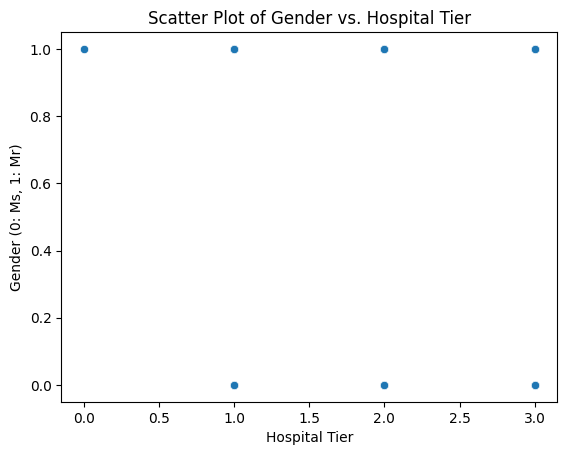

In [ ]:
sns.scatterplot(x='Hospital tier', y='gender', data=df)
plt.title('Scatter Plot of Gender vs. Hospital Tier')
plt.xlabel('Hospital Tier')
plt.ylabel('Gender (0: Ms, 1: Mr)')
plt.show()

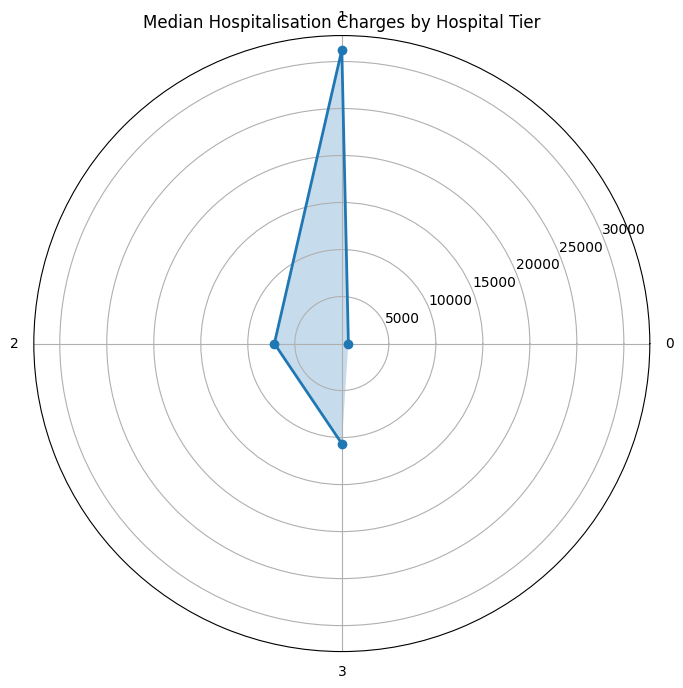

In [ ]:
median_charges = df.groupby('Hospital tier')['charges'].median()

# Get hospital tiers and their median charges
hospital_tiers = median_charges.index
charges = median_charges.values

# Number of hospital tiers
num_tiers = len(hospital_tiers)

# Angle for each tier in the radar chart
angles = np.linspace(0, 2 * np.pi, num_tiers, endpoint=False)


fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)


ax.plot(angles, charges, 'o-', linewidth=2)
ax.fill(angles, charges, alpha=0.25)


ax.set_thetagrids(angles * 180/np.pi, hospital_tiers)


# Set title
ax.set_title("Median Hospitalisation Charges by Hospital Tier")

# Display the chart
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'df' is your DataFrame

# 1. Prepare the Data
features = ['Hospital tier', 'children', 'smoker', 'gender']  # Select features
target = 'charges'  # Target variable

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Split data

# 2. Choose and Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

# 3. Make Predictions
y_pred = model.predict(X_test)

# 4. Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Further Analysis and Improvement
# Explore other regression algorithms (e.g., Random Forest, XGBoost)
# Feature engineering to create new or more informative features
# Hyperparameter tuning to optimize model performance

Mean Squared Error: 82124561.55542627
R-squared: 0.38674976875939326


In [ ]:
results_df = pd.DataFrame({'Actual Charges': y_test, 'Predicted Charges': y_pred})

In [ ]:
results_df

,Actual Charges,Predicted Charges
Customer ID,,
"(Id304, Id2036, Id2036)",31196.61,17039.067321
"(Id614, Id1725, Id1725)",16097.94,16037.752222
"(Id166, Id2177, Id2177)",37277.27,24575.490945
"(Id1423, Id916, Id916)",7445.92,10514.294299
"(Id314, Id2026, Id2026)",30366.93,18384.489623
...,...,...
"(Id672, Id1667, Id1667)",14711.74,18384.489623
"(Id1984, Id354, Id354)",3342.79,16037.752222
"(Id851, Id1488, Id1488)",12592.53,9179.207501


In [ ]:
from sklearn.ensemble import RandomForestRegressor  # Import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'df' is your DataFrame



# 2. Choose and Train the Model
model = RandomForestRegressor(random_state=42)  # Use RandomForestRegressor
model.fit(X_train, y_train)

# 3. Make Predictions
y_pred = model.predict(X_test)

# 4. Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# 5. Create DataFrame for Actual and Predicted
results_df = pd.DataFrame({'Actual Charges': y_test, 'Predicted Charges': y_pred})

# Display the DataFrame
print(results_df.head())  # Display first few rows

# Optional: Reset index for better readability
results_df = results_df.reset_index(drop=True)
print(results_df.head())

Mean Squared Error: 79743461.23827691
R-squared: 0.4045302024377322
                         Actual Charges  Predicted Charges
Customer ID                                               
(Id304, Id2036, Id2036)        31196.61       14180.749365
(Id614, Id1725, Id1725)        16097.94       13880.599085
(Id166, Id2177, Id2177)        37277.27       28916.616031
(Id1423, Id916, Id916)          7445.92       11629.764871
(Id314, Id2026, Id2026)        30366.93       17333.959827
   Actual Charges  Predicted Charges
0        31196.61       14180.749365
1        16097.94       13880.599085
2        37277.27       28916.616031
3         7445.92       11629.764871
4        30366.93       17333.959827


In [ ]:
from xgboost import XGBRegressor  # Import XGBRegressor
# 2. Choose and Train the Model
model = XGBRegressor(random_state=42)  # Use XGBRegressor
model.fit(X_train, y_train)

# 3. Make Predictions
y_pred = model.predict(X_test)

# 4. Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# 5. Create DataFrame for Actual and Predicted
results_df = pd.DataFrame({'Actual Charges': y_test, 'Predicted Charges': y_pred})

# Display the DataFrame
print(results_df.head())  # Display first few rows

# Optional: Reset index for better readability
results_df = results_df.reset_index(drop=True)
print(results_df.head())

Mean Squared Error: 79857227.267079
R-squared: 0.40368067530298934
                         Actual Charges  Predicted Charges
Customer ID                                               
(Id304, Id2036, Id2036)        31196.61       14255.120117
(Id614, Id1725, Id1725)        16097.94       13998.794922
(Id166, Id2177, Id2177)        37277.27       29059.591797
(Id1423, Id916, Id916)          7445.92       11598.156250
(Id314, Id2026, Id2026)        30366.93       17324.730469
   Actual Charges  Predicted Charges
0        31196.61       14255.120117
1        16097.94       13998.794922
2        37277.27       29059.591797
3         7445.92       11598.156250
4        30366.93       17324.730469


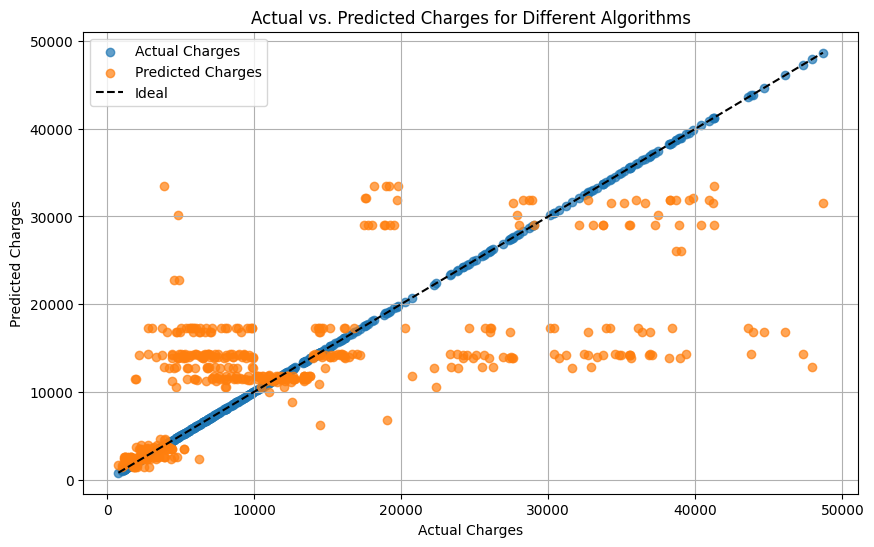

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Scatter plot for Actual vs. Predicted
for model_name, y_pred in results_df.items():
    plt.scatter(y_test, y_pred, label=model_name, alpha=0.7)  # alpha for transparency

# Plot the ideal line (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', label='Ideal')

plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs. Predicted Charges for Different Algorithms')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Performing Null Hypothesis
import scipy.stats as stats

In [ ]:
# Assuming 'df' is your DataFrame and 'Hospital tier' and 'charges' are the columns
hospital_tier_1 = df[df['Hospital tier'] == 1]['charges']
hospital_tier_2 = df[df['Hospital tier'] == 2]['charges']
hospital_tier_3 = df[df['Hospital tier'] == 3]['charges']

fvalue, pvalue = stats.f_oneway(hospital_tier_1, hospital_tier_2, hospital_tier_3)

print(f"F-statistic: {fvalue:.2f}")
print(f"P-value: {pvalue:.3f}")

F-statistic: 488.16
P-value: 0.000


In [ ]:
# Assuming 'city_type' is the column for city types
city_type_1 = df[df['City tier'] == 1]['charges']
city_type_2 = df[df['City tier'] == 2]['charges']
city_type_3 = df[df['City tier'] == 3]['charges']

fvalue, pvalue = stats.f_oneway(city_type_1, city_type_2, city_type_3)

print(f"F-statistic: {fvalue:.2f}")
print(f"P-value: {pvalue:.3f}")

F-statistic: 1.08
P-value: 0.338


In [ ]:
# Assuming 'smoker' (1 for smoker, 0 for non-smoker) and 'charges' are the columns
smoker_charges = df[df['smoker'] == 1]['charges']
nonsmoker_charges = df[df['smoker'] == 0]['charges']

tstatistic, pvalue = stats.ttest_ind(smoker_charges, nonsmoker_charges)

print(f"T-statistic: {tstatistic:.2f}")
print(f"P-value: {pvalue:.3f}")

T-statistic: 1.36
P-value: 0.173


In [ ]:
# Assuming 'smoker' (1 for smoker, 0 for non-smoker) and 'heart_issues' (1 for yes, 0 for no) are the columns
from scipy.stats import chi2_contingency


contingency_table = pd.crosstab(df['smoker'], df['Heart Issues'])

chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("===Chi2 Stat===")
print(chi2_stat)
print("\n")
print("===Degrees of Freedom===")
print(dof)
print("\n")
print("===P-Value===")
print(p_val)
print("\n")
print("===Contingency Table===")
print(contingency_table)

===Chi2 Stat===
1.3941176869396663


===Degrees of Freedom===
2


===P-Value===
0.4980479888388789


===Contingency Table===
Heart Issues     0    1
smoker                 
0                2    0
1             1110  735
2              297  191


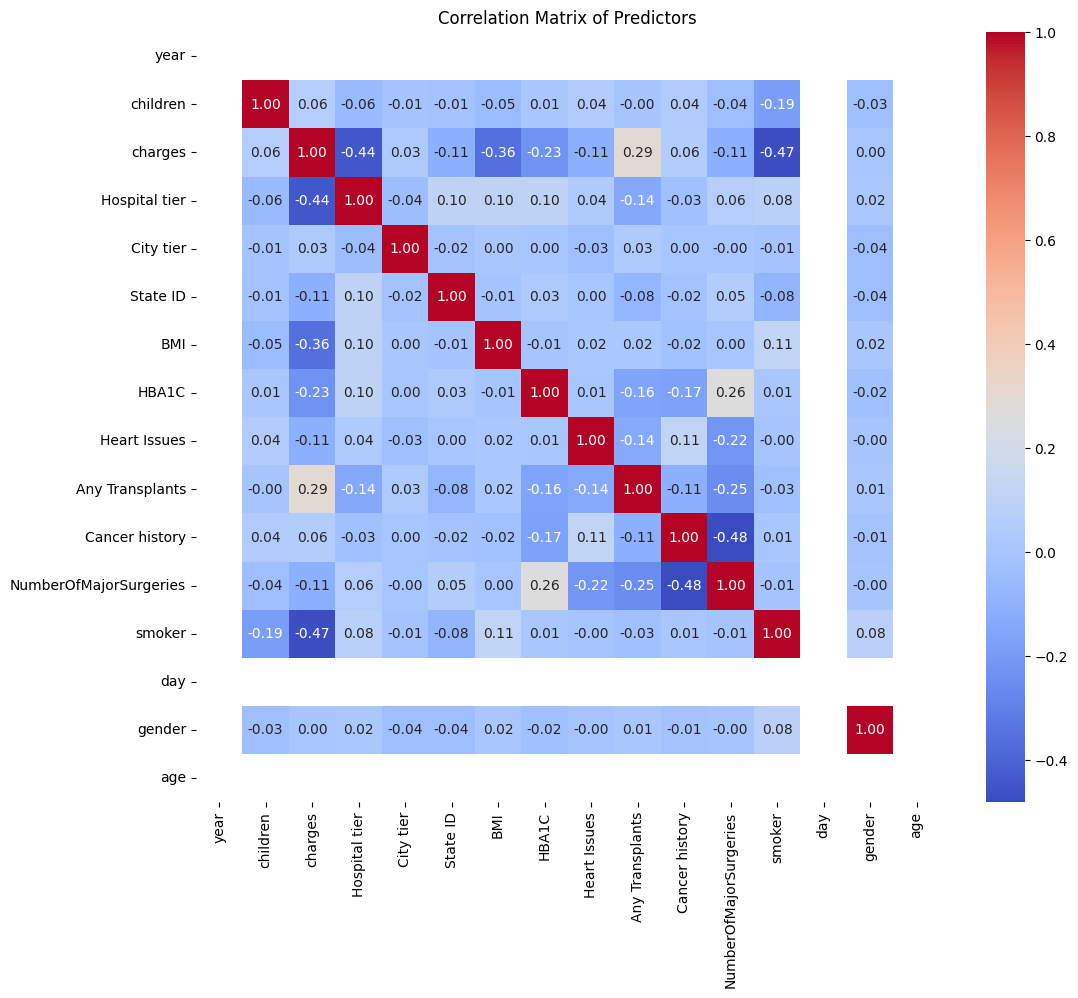

In [ ]:
numerical_columns = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_columns].drop(columns=['date'], errors='ignore').corr()
# Drop 'date' if present in numerical columns
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Predictors')
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, GridSearchCV  # Import KFold



# 1. Create Folds and Fold Identifier
skf = KFold(n_splits=5, shuffle=True, random_state=42)
df['fold'] = -1  # Initialize fold column
numerical_indices = df.index.get_indexer(X.index)

for fold, (train_index, test_index) in enumerate(skf.split(X, pd.qcut(y, 5, labels=False))):
    # Use numerical_indices to map the test_index to the correct rows in df
    df.loc[X.index[test_index], 'fold'] = fold


# 2. Build Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardization
    ('regressor', Ridge())  # Choose Linear or Ridge here
])

# 3. Define Hyperparameter Grid (if using Ridge)
param_grid = {
    'regressor__alpha': [0.01, 0.1, 1, 10, 100]  # Example values for Ridge alpha
}

# 4. Perform Stratified k-fold Cross-Validation with Hyperparameter Tuning
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=skf, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# 5. Evaluate Model
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_

print(f"Best Model: {best_model}")
print(f"Best Score (Negative MSE): {best_score}")

# You can further analyze the model and its performance using the 'grid_search' object.

Best Model: Pipeline(steps=[('scaler', StandardScaler()), ('regressor', Ridge(alpha=10))])
Best Score (Negative MSE): -83122957.6846177


In [ ]:
# Case study

# Create a DataFrame for Ms. Jayna's information
jayna_data = {
    'Hospital tier': [1],  # Tier-1 hospital
    'children': [2],  # Two children
    'smoker': [1],  # Smoker (1 for yes)
    'gender': [0]  # Female (0 for Ms.)
}

jayna_df = pd.DataFrame(jayna_data)

# Use the trained model to predict the cost
predicted_cost = best_model.predict(jayna_df)[0]

# Display the predicted cost
print(f"Estimated hospitalization cost for Ms. Jayna: ${predicted_cost:.2f}")

Estimated hospitalization cost for Ms. Jayna: $23945.14


In [ ]:
predicted_cost = best_model.predict(jayna_df)[0]

# Display the predicted cost
print(f"Predicated hospitalization cost for Ms. Jayna: ${predicted_cost:.2f}")

Predicated hospitalization cost for Ms. Jayna: $23945.14
